# **CNN Architecture:**
 Welcome to the CNN Architecture notebook, your go-to resource for understanding Convolutional Neural Networks (CNNs). From the basics to advanced concepts, we cover it all in this concise guide. Get ready to unravel the power of CNNs in image recognition, object detection, and more!

In [1]:
# Import necessary libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# **Download Dataset**
The CIFAR (Canadian Institute For Advanced Research) dataset is a popular benchmark in machine learning and computer vision. It consists of two datasets:

CIFAR-10: 60,000 32x32 color images in 10 classes, with 6,000 images per class.
CIFAR-100: 60,000 32x32 color images in 100 classes, with 600 images per class.
Each dataset is divided into 50,000 training images and 10,000 test images.

Classes
CIFAR-10: Airplane, Automobile, Bird, Cat, Deer, Dog, Frog, Horse, Ship, Truck


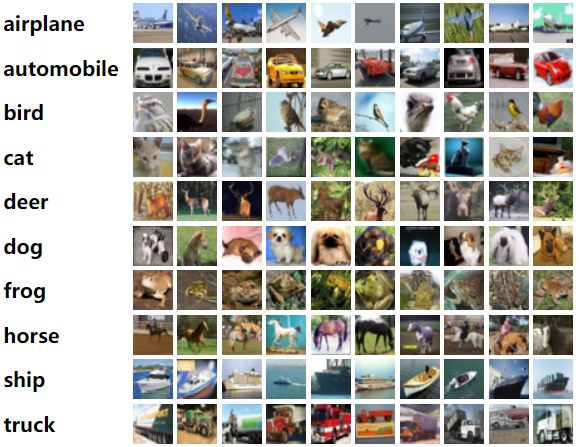

In [2]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

### Display Sample Images with Class Labels

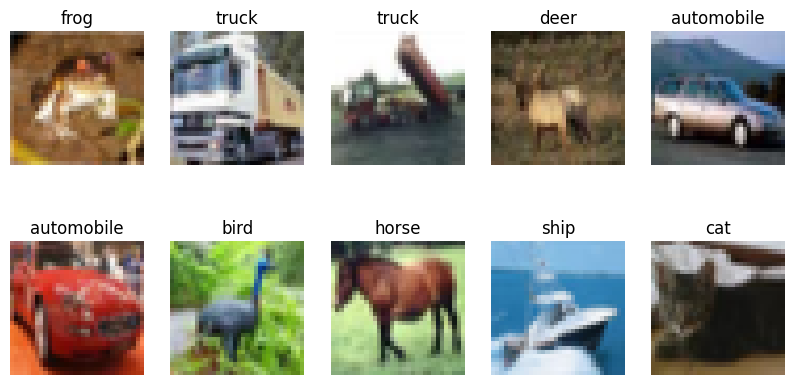

In [3]:
# Define the class labels
class_labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Initialize the figure and subplots
fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Iterate through the first 10 images
for i, ax in enumerate(axes.flat):
    # Select the image and label
    image, label = x_train[i], y_train[i]

    # Display the image
    ax.imshow(image, cmap='gray')

    # Set the title with the class label
    ax.set_title(f"{class_labels[label.item()]}")
    ax.axis('off')

# Display the figure
plt.show()

In [4]:
# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# Convert class vectors to binary class matrices / one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### Define CNN Architecture

In [6]:
# Define the CNN model
model = Sequential()
# Conv2D layer with 32 filters, kernel size 3x3, input shape (32, 32, 3)
# Input size: 32x32x3, Kernel size: 3x3, Number of kernels: 32, Output size: 30x30x32. [input_size-kernel]+1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# MaxPooling2D layer with pool size 2x2
# Output size: 15x15x32
model.add(MaxPooling2D((2, 2)))

#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))


# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 15x15x32, Kernel size: 3x3, Number of kernels: 64, Output size: 13x13x64
model.add(Conv2D(64, (3, 3), activation='relu'))
# MaxPooling2D layer with pool size 2x2
# Output size: 6x6x64
model.add(MaxPooling2D((2, 2)))
# Conv2D layer with 64 filters, kernel size 3x3
# Input size: 6x6x64, Kernel size: 3x3, Number of kernels: 64, Output size: 4x4x64
model.add(Conv2D(64, (3, 3), activation='relu'))
# Flatten layer
# Output size: 1024
model.add(Flatten())
# Dense layer with 64 units
# Input size: 1024, Output size: 64
model.add(Dense(64, activation='relu'))
# Dense layer with 10 units (output layer)
# Input size: 64, Output size: 10

model.add(Dense(10, activation='softmax'))

c:\Users\Azam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# **Parameters in ANN on Cifar-10**
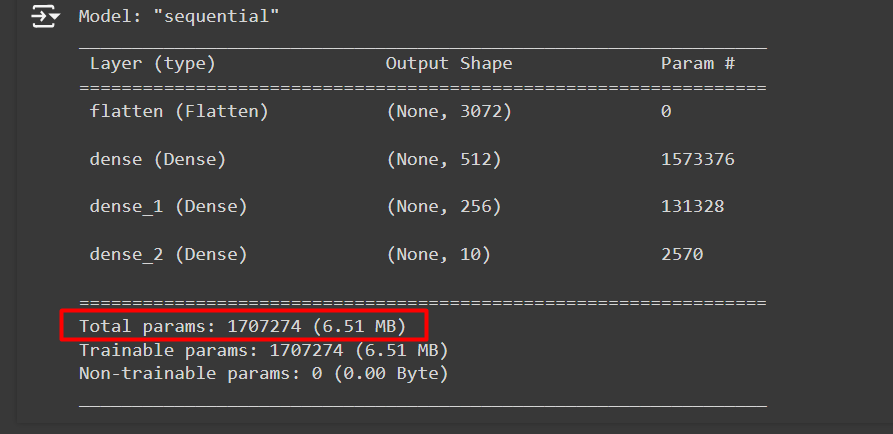

In [8]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#other optimizer SGD, RMSprop, Adadelta, Adagrad, Adamax etc
# other loss functions are mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_logarithmic_error, binary_crossentropy


In [9]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=5,
          validation_data=(x_test, y_test))

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.3626 - loss: 1.7204 - val_accuracy: 0.5618 - val_loss: 1.2291
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.5772 - loss: 1.1929 - val_accuracy: 0.6168 - val_loss: 1.0861
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.6430 - loss: 1.0054 - val_accuracy: 0.6595 - val_loss: 0.9751
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.6791 - loss: 0.9017 - val_accuracy: 0.6862 - val_loss: 0.9074
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.7137 - loss: 0.8189 - val_accuracy: 0.6932 - val_loss: 0.8948


In [10]:
# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6970 - loss: 0.8901
Test accuracy: 0.6931999921798706


In [12]:
# Evaluate the model
loss, accuracy = model.evaluate(x_train, y_train)
print('Test accuracy:', accuracy)

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7385 - loss: 0.7480
Test accuracy: 0.7371399998664856


In [13]:
pred = model.predict(x_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


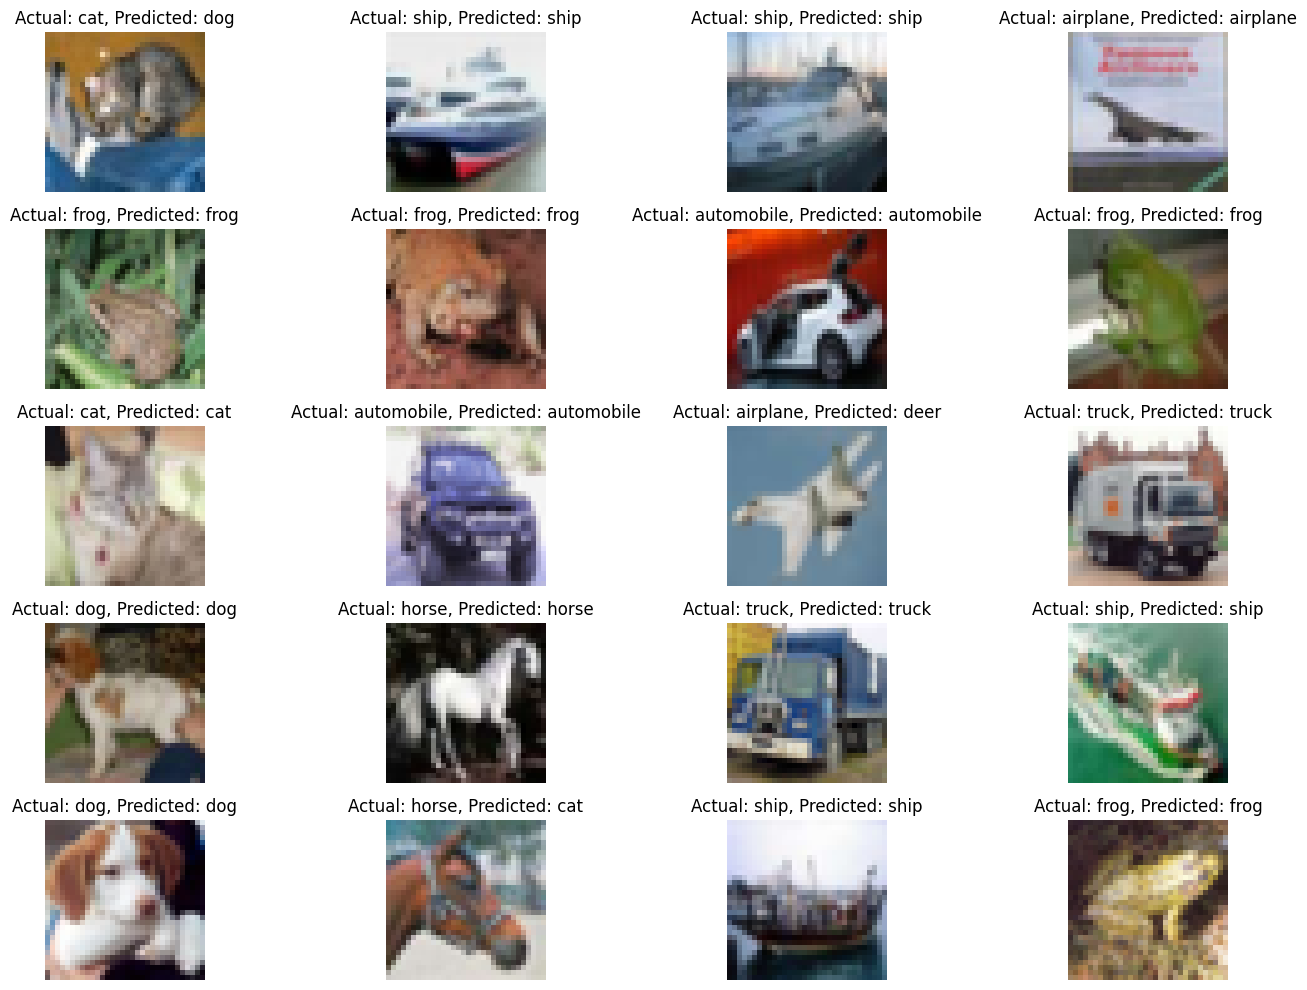

In [14]:
num_images_to_display = 20
num_columns = 4
num_rows = (num_images_to_display + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
for i, ax in enumerate(axes.flat):
    if i < num_images_to_display:
        ax.imshow(x_test[i])
        actual_label = class_labels[np.argmax(y_test[i])]
        predicted_label = class_labels[np.argmax(pred[i])]
        ax.set_title(f"Actual: {actual_label}, Predicted: {predicted_label}")
        ax.axis('off')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
